In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn

In [2]:
# Read in DataSet and clean nan inputs
starOrignialDF= pd.read_csv('pulsarStarData.csv', encoding = 'utf8')
starOrignialDF=starOrignialDF.dropna()

In [3]:
# Rename target column for prediction
starOrignialDF.rename(columns={'target_class': 'Pulsar_Star'}, inplace=True)
starOrignialDF.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Pulsar_Star
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
starOrignialDF.data = starOrignialDF.drop("Pulsar_Star", axis=1)
starOrignialDF.target = starOrignialDF["Pulsar_Star"]

C:\Users\caraa\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
C:\Users\caraa\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [6]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(starOrignialDF.data, starOrignialDF.target)
rf.score(starOrignialDF.data, starOrignialDF.target)

1.0

In [7]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([0.19851858, 0.04999509, 0.33233966, 0.2019507 , 0.05450587,
       0.06854343, 0.05294875, 0.04119791])

In [8]:
# We can sort the features by their importance
forestResult = sorted(zip(rf.feature_importances_, starOrignialDF), reverse=True)
forestResult

[(0.33233966436993484, ' Excess kurtosis of the integrated profile'),
 (0.2019506999785731, ' Skewness of the integrated profile'),
 (0.19851858396597627, 'Mean of the integrated profile'),
 (0.06854342582474973, ' Standard deviation of the DM-SNR curve'),
 (0.054505871148700084, ' Mean of the DM-SNR curve'),
 (0.05294875484243588, ' Excess kurtosis of the DM-SNR curve'),
 (0.04999509276235026, ' Standard deviation of the integrated profile'),
 (0.041197907107279906, ' Skewness of the DM-SNR curve')]

In [9]:
importanceRatio_DF= pd.DataFrame({
                          "Importance Rating":importances})
importanceRatio_DF

# To sort from highest to lowest, ascending=False must be passed in & resest index
descendingImportanceRatio_DF= importanceRatio_DF.sort_values("Importance Rating", ascending=False).reset_index(drop=True)
descendingImportanceRatio_DF.head(8)

,Importance Rating
0,0.332340
1,0.201951
2,0.198519
3,0.068543
4,0.054506
5,0.052949
6,0.049995
7,0.041198


In [10]:
descendingFeatures= ['Excess kurtosis of the integrated profile',' Skewness of the integrated profile',
                     'Mean of the integrated profile',' Mean of the DM-SNR curve',
                     ' Standard deviation of the DM-SNR curve',' Standard deviation of the integrated profile',
                     ' Skewness of the DM-SNR curve',' Excess kurtosis of the DM-SNR curve']

In [11]:
decendingRating= descendingImportanceRatio_DF['Importance Rating']
decendingRating.head(3)

0    0.332340
1    0.201951
2    0.198519
Name: Importance Rating, dtype: float64

In [12]:
# intialise data of lists. 
data = {"Prediction_Importance_Feature":descendingFeatures,
        'Importance_Rating':decendingRating} 
  
# Create DataFrame 
print('               Importance Features')
print('           __________________________')

finalImportance_df= pd.DataFrame(data) 
finalImportance_df

               Importance Features
           __________________________


,Prediction_Importance_Feature,Importance_Rating
0,Excess kurtosis of the integrated profile,0.332340
1,Skewness of the integrated profile,0.201951
2,Mean of the integrated profile,0.198519
3,Mean of the DM-SNR curve,0.068543
4,Standard deviation of the DM-SNR curve,0.054506
5,Standard deviation of the integrated profile,0.052949
6,Skewness of the DM-SNR curve,0.049995
7,Excess kurtosis of the DM-SNR curve,0.041198


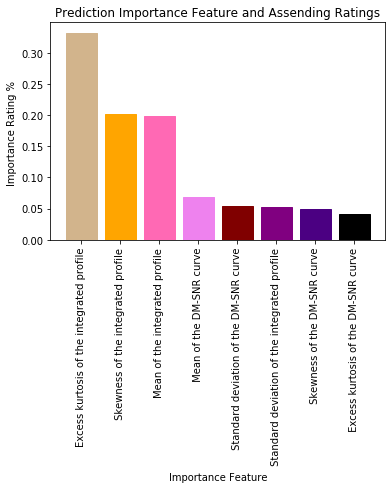

In [13]:
# Bar Plots
X_axis = finalImportance_df['Prediction_Importance_Feature']
y_axis = finalImportance_df['Importance_Rating']

barList = plt.bar(X_axis,y_axis)
#colors 
barList[0].set_color('tan')
barList[1].set_color('orange')
barList[2].set_color('hotpink')
barList[3].set_color('violet')
barList[4].set_color('maroon')
barList[5].set_color('purple')
barList[6].set_color('indigo')
barList[7].set_color('black')
# Orient widths. Add labels, tick marks, etc. 
plt.title("Prediction Importance Feature and Assending Ratings")
plt.ylabel("Importance Rating % ")
plt.xlabel("Importance Feature")
plt.xticks(np.arange(0,8,1))
plt.xticks(rotation=90)

# Show the Figure
plt.show()

In [14]:
# To sort from lowest to highest for adjusting horizontal barchart, ascending=True must be passed in & resest index 
newImportance_df= finalImportance_df.sort_values("Importance_Rating", ascending=True).reset_index(drop=True)
newImportance_df.head(8)

,Prediction_Importance_Feature,Importance_Rating
0,Excess kurtosis of the DM-SNR curve,0.041198
1,Skewness of the DM-SNR curve,0.049995
2,Standard deviation of the integrated profile,0.052949
3,Standard deviation of the DM-SNR curve,0.054506
4,Mean of the DM-SNR curve,0.068543
5,Mean of the integrated profile,0.198519
6,Skewness of the integrated profile,0.201951
7,Excess kurtosis of the integrated profile,0.332340


Text(0.5, 1.0, 'Prediction Importance Feature and Assending Ratings')

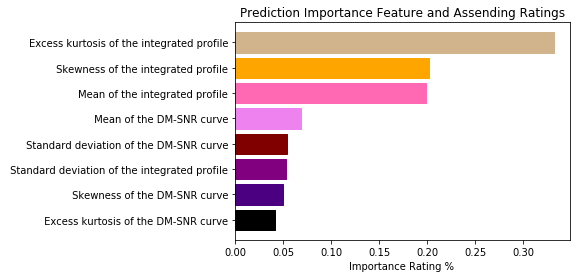

In [15]:
X_axis = newImportance_df['Prediction_Importance_Feature']
y_axis = newImportance_df['Importance_Rating']
barList = plt.barh(X_axis, y_axis)
#colors 
barList[0].set_color('black')
barList[1].set_color('indigo')
barList[2].set_color('purple')
barList[3].set_color('maroon')
barList[4].set_color('violet')
barList[5].set_color('hotpink')
barList[6].set_color('orange')
barList[7].set_color('tan')



plt.xlabel("Importance Rating % ")
plt.title("Prediction Importance Feature and Assending Ratings")

In [17]:
# Assign the data to X and y

X =starOrignialDF.drop("Pulsar_Star", axis=1)
y = starOrignialDF["Pulsar_Star"]
print(X.shape, y.shape)

(17898, 8) (17898,)


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [19]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [20]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.9798882681564246


In [21]:
print(f"DEFAULT OUTCOME KEY: (Pulsar YES: 1 , Pulsar NO: 0 )")
print(f"------------------------------------------------------")
print(f"Predicted Outcome: {y_pred}")
print(f"Actual Outcome: {list(y_test[:])}")

DEFAULT OUTCOME KEY: (Pulsar YES: 1 , Pulsar NO: 0 )
------------------------------------------------------
Predicted Outcome: [0 1 0 ... 0 0 0]
Actual Outcome: [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0

In [22]:
from pandas_ml import ConfusionMatrix

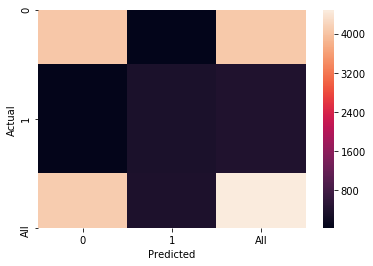

In [23]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)
sn.heatmap(confusion_matrix, annot=False)

In [24]:
confusion_matrix.describe()

Predicted,0,1,All
count,3.000000,3.000000,3.000000
mean,2734.000000,249.333333,2983.333333
std,2315.946243,190.539585,2242.883040
min,60.000000,30.000000,404.000000
25%,2050.500000,187.000000,2237.500000
50%,4041.000000,344.000000,4071.000000
75%,4071.000000,359.000000,4273.000000
max,4101.000000,374.000000,4475.000000


In [25]:
data = {'y_Act':y_test,
        'y_Pred': y_pred
        }

matrix_df = pd.DataFrame(data, columns=['y_Act','y_Pred'])
Confusion_Matrix = ConfusionMatrix(matrix_df['y_Act'], matrix_df['y_Pred'])
Confusion_Matrix.print_stats()

population: 4475
P: 404
N: 4071
PositiveTest: 374
NegativeTest: 4101
TP: 344
TN: 4041
FP: 30
FN: 60
TPR: 0.8514851485148515
TNR: 0.9926308032424466
PPV: 0.9197860962566845
NPV: 0.9853694220921726
FPR: 0.007369196757553427
FDR: 0.08021390374331551
FNR: 0.1485148514851485
ACC: 0.9798882681564246
F1_score: 0.884318766066838
MCC: 0.8741030899495871
informedness: 0.844115951757298
markedness: 0.9051555183488571
prevalence: 0.09027932960893854
LRP: 115.54653465346534
LRN: 0.1496174116298044
DOR: 772.28
FOR: 0.014630577907827359


In [26]:
# Check all classifier variables : Max / Min params 
var_max = starOrignialDF[:].max()
var_mean = starOrignialDF[:].mean()
var_min = starOrignialDF[:].min()

print(f"variable_max: {var_max}")
print(f"variable_mean: {var_mean}")
print(f"variable_min: {var_min}")

variable_max: Mean of the integrated profile                    192.617188
 Standard deviation of the integrated profile      98.778911
 Excess kurtosis of the integrated profile          8.069522
 Skewness of the integrated profile                68.101622
 Mean of the DM-SNR curve                         223.392140
 Standard deviation of the DM-SNR curve           110.642211
 Excess kurtosis of the DM-SNR curve               34.539844
 Skewness of the DM-SNR curve                    1191.000837
Pulsar_Star                                         1.000000
dtype: float64
variable_mean: Mean of the integrated profile                   111.079968
 Standard deviation of the integrated profile     46.549532
 Excess kurtosis of the integrated profile         0.477857
 Skewness of the integrated profile                1.770279
 Mean of the DM-SNR curve                         12.614400
 Standard deviation of the DM-SNR curve           26.326515
 Excess kurtosis of the DM-SNR curve           

In [27]:
dataStatDF= pd.DataFrame({
                          "Max_Input":var_max, "Mean_Input": var_mean, "Min_Input": var_min})
dataStatDF

,Max_Input,Mean_Input,Min_Input
Mean of the integrated profile,192.617188,111.079968,5.812500
Standard deviation of the integrated profile,98.778911,46.549532,24.772042
Excess kurtosis of the integrated profile,8.069522,0.477857,-1.876011
Skewness of the integrated profile,68.101622,1.770279,-1.791886
Mean of the DM-SNR curve,223.392140,12.614400,0.213211
Standard deviation of the DM-SNR curve,110.642211,26.326515,7.370432
Excess kurtosis of the DM-SNR curve,34.539844,8.303556,-3.139270
Skewness of the DM-SNR curve,1191.000837,104.857709,-1.976976
Pulsar_Star,1.000000,0.091574,0.000000


In [28]:
# intialise data of lists. 5.812500
data = {" Mean of the integrated profile"               :[192.617188,111.079968, 5.812500],
        "Standard deviation of the integrated profile"  : [98.778911,46.549532, 24.772042],
        "Excess kurtosis of the integrated profile"     : [ 8.069522, 0.477857, -1.876011],
        "Skewness of the integrated profile"            : [ 68.101622,1.770279,-1.791886],
        "Mean of the DM-SNR curve"                      : [223.392140,12.614400,0.213211],
        "Standard deviation of the DM-SNR curve"        : [110.642211,26.326515, 7.370432],
        "Excess kurtosis of the DM-SNR curve"           :  [34.539844,8.303556,-3.139270],
        "Skewness of the DM-SNR curve"                  :[1191.000837,0.091574, -1.976976],
        } 
 
# Create DataFrame 
print('               Mock DF')
print('           __________________________')

mockDF= pd.DataFrame.from_dict(data) 
mockDF

               Mock DF
           __________________________


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837
1,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,0.091574
2,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976


In [29]:
mockDF.index = ["Max_Inputs","Mean_Inputs","Min_Inputs"]
mockDF

prediction = clf.predict(mockDF[:3])
print ('Predicted Result: ', prediction)

Predicted Result:  [1 0 0]


In [30]:
mockDF["Pulsar Star Predictions"]= prediction
mockDF

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Pulsar Star Predictions
Max_Inputs,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1
Mean_Inputs,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,0.091574,0
Min_Inputs,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0
